# Loading the data

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("student_data.csv")

data[:10]

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
5,1,760,3.00,2
6,1,560,2.98,1
7,0,400,3.08,2
8,1,540,3.39,3
9,0,700,3.92,2


# Plotting the data

In [2]:
import matplotlib.pyplot as plt

def plot_points(data):
    X=np.array(data[['gre', 'gpa']])
    Y=np.array(data['admit'])

    admitted = X[np.argwhere(Y==1)]
    rejected = X[np.argwhere(Y==0)]

    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'green', edgecolor = 'k')

    plt.xlabel('gre')
    plt.ylabel('gpa')

plot_points(data)
plt.show()

<Figure size 640x480 with 1 Axes>

# Separating the ranks

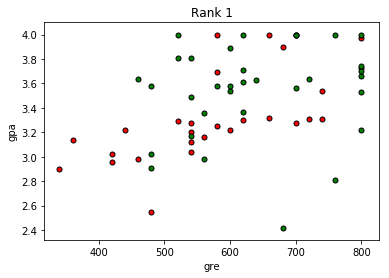

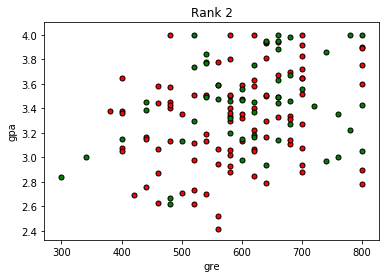

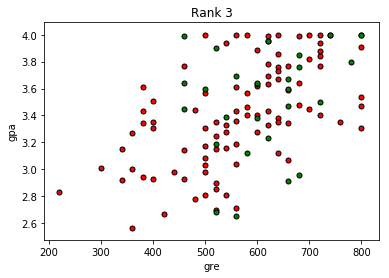

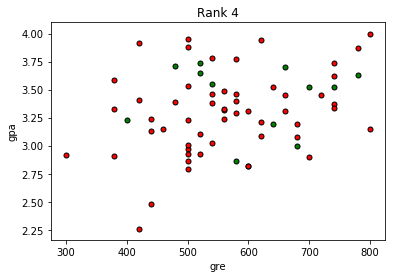

In [3]:
# rank1
data_rank1 = data[data['rank'] == 1]

plot_points(data_rank1)
plt.title("Rank 1")
plt.show()

# rank2
data_rank2 = data[data['rank'] == 2]

plot_points(data_rank2)
plt.title("Rank 2")
plt.show()

# rank3
data_rank3 = data[data['rank'] == 3]

plot_points(data_rank3)
plt.title("Rank 3")
plt.show()

# rank4
data_rank4 = data[data['rank'] == 4]

plot_points(data_rank4)
plt.title("Rank 4")
plt.show()

# One hot encoding the rank

In [4]:
one_hot_data = pd.concat([data, pd.get_dummies(data['rank'], prefix='rank')], axis=1)
one_hot_data = one_hot_data.drop('rank', axis=1)

one_hot_data[:10]

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1
5,1,760,3.00,0,1,0,0
6,1,560,2.98,1,0,0,0
7,0,400,3.08,0,1,0,0
8,1,540,3.39,0,0,1,0
9,0,700,3.92,0,1,0,0


# Processing data

In [5]:
process_data = one_hot_data
process_data['gre'] = process_data['gre']/800
process_data['gpa'] = process_data['gre']/4.00

process_data[:10]

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,0.475,0.11875,0,0,1,0
1,1,0.825,0.20625,0,0,1,0
2,1,1.000,0.25000,1,0,0,0
3,1,0.800,0.20000,0,0,0,1
4,0,0.650,0.16250,0,0,0,1
5,1,0.950,0.23750,0,1,0,0
6,1,0.700,0.17500,1,0,0,0
7,0,0.500,0.12500,0,1,0,0
8,1,0.675,0.16875,0,0,1,0
9,0,0.875,0.21875,0,1,0,0


# Splitting data

In [6]:
sample = np.random.choice(process_data.index, size=int(len(process_data)*0.9), replace=False)

train_data, test_data = process_data.iloc[sample], process_data.drop(sample)

print("The number of train_data: ", len(train_data))
print("The number of test_data: ", len(test_data))
print("\n")                                                                     
print(train_data[:10])
print(test_data[:10])                                                                     

The number of train_data:  360
The number of test_data:  40


     admit    gre      gpa  rank_1  rank_2  rank_3  rank_4
49       0  0.500  0.12500       0       0       1       0
332      0  0.525  0.13125       1       0       0       0
17       0  0.450  0.11250       0       0       1       0
80       0  0.875  0.21875       0       0       0       1
28       1  0.975  0.24375       0       1       0       0
337      0  0.775  0.19375       0       0       0       1
3        1  0.800  0.20000       0       0       0       1
189      0  0.625  0.15625       0       1       0       0
226      0  0.775  0.19375       0       1       0       0
144      0  0.725  0.18125       0       0       0       1
     admit    gre      gpa  rank_1  rank_2  rank_3  rank_4
4        0  0.650  0.16250       0       0       0       1
5        1  0.950  0.23750       0       1       0       0
23       0  0.850  0.21250       0       0       0       1
66       0  0.925  0.23125       0       0       0   

# Keras

In [7]:
import keras

features = np.array(train_data.drop('admit', axis=1))
targets = np.array(keras.utils.to_categorical(train_data['admit'], 2))

features_test = np.array(test_data.drop('admit', axis=1))
targets_test = np.array(keras.utils.to_categorical(test_data['admit'], 2))

print(features_test[:10])
print(targets_test[:10])

Using TensorFlow backend.


[[0.65    0.1625  0.      0.      0.      1.     ]
 [0.95    0.2375  0.      1.      0.      0.     ]
 [0.85    0.2125  0.      0.      0.      1.     ]
 [0.925   0.23125 0.      0.      0.      1.     ]
 [0.9     0.225   0.      0.      0.      1.     ]
 [0.775   0.19375 0.      0.      1.      0.     ]
 [0.675   0.16875 0.      1.      0.      0.     ]
 [0.725   0.18125 0.      1.      0.      0.     ]
 [0.625   0.15625 0.      0.      1.      0.     ]
 [0.7     0.175   0.      0.      0.      1.     ]]
[[1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


# Building model

In [8]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

# building model
model = Sequential()

model.add(Dense(128, activation='sigmoid' ,input_dim=features.shape[1]))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(2, activation='sigmoid'))

# compiling model
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               896       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 5,090
Trainable params: 5,090
Non-trainable params: 0
_________________________________________________________________


# Training the model

In [9]:
model.fit(features, targets, epochs=10, batch_size=100)

score = model.evaluate(features_test, targets_test)
print("\nscore: ", score[1])

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
360/360 [==============================] - 0s 846us/step - loss: 0.8059 - acc: 0.3167
Epoch 2/10
360/360 [==============================] - 0s 22us/step - loss: 0.7063 - acc: 0.3861
Epoch 3/10
360/360 [==============================] - 0s 25us/step - loss: 0.6528 - acc: 0.6833
Epoch 4/10
360/360 [==============================] - 0s 25us/step - loss: 0.6281 - acc: 0.6833
Epoch 5/10
360/360 [==============================] - 0s 37us/step - loss: 0.6227 - acc: 0.6833
Epoch 6/10
360/360 [==============================] - 0s 17us/step - loss: 0.6245 - acc: 0.6833
Epoch 7/10
360/360 [==============================] - 0s 21us/step - loss: 0.6276 - acc: 0.6833
Epoch 8/10
360/360 [==============================] - 0s 16us/step - loss: 0.6282 - acc: 0.6833
Epoch 9/10
360/360 [==============================] - 0s 15us/step - loss: 0.6269 - acc: 0.6833
Epoch 10/10
40/40 [==============================] - 0s 953us/step

score:  0.675
